In [25]:
import pandas as pd

fd = pd.read_excel('wordle_Q3.xlsx')
typical_columns = ['1 try',	'2 tries'	,'3 tries'	,'4 tries'	,'5 tries',	'6 tries',	'7 or more tries (X)',	'sum of frequencies of letters in word',	'Number of repetitive letter', 'word possibility']
train_data = fd[typical_columns].values




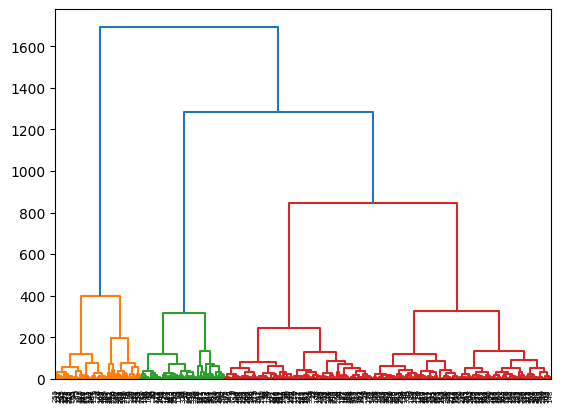

In [26]:
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram
#这里使用scipy的层次聚类函数
Z = linkage(train_data, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
# plt.savefig('img/AGG层次聚类.png',dpi=300)
plt.show()

[1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
聚类轮廓系数为：0.49077540760944416


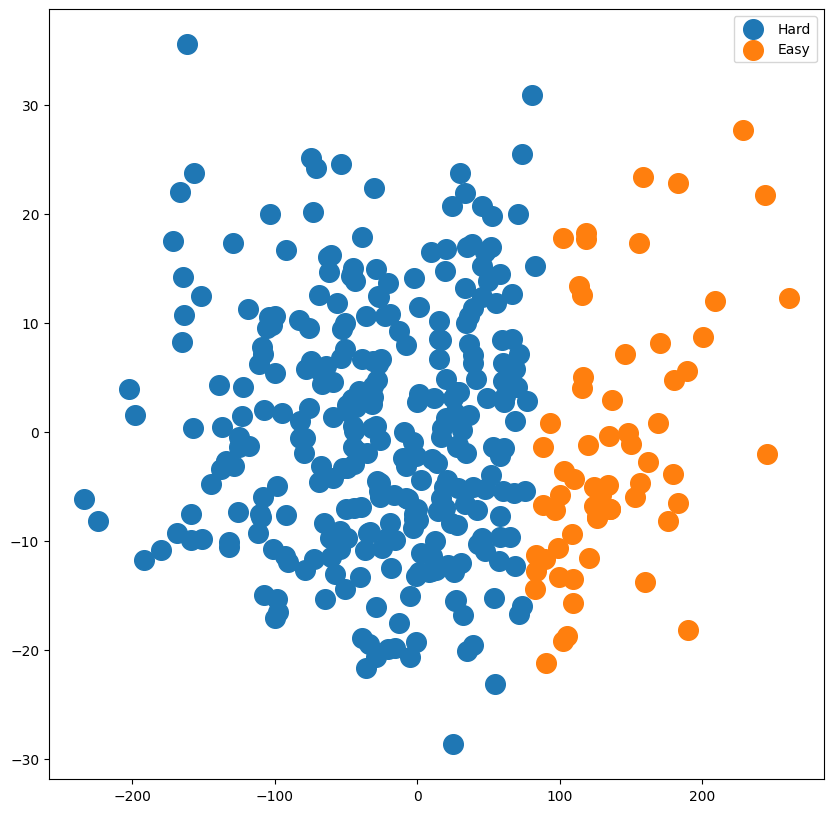

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
data1 = train_data

clf1 = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
s = clf1.fit(data1)
pred1 = clf1.fit_predict(data1)
print(pred1)
score1 = silhouette_score(data1, pred1)
print(f'聚类轮廓系数为：{score1}')
pca = PCA(n_components=3)  # 输出两维
newData1 = pca.fit_transform(data1)  # 载入N维

x1, y1 = [], []
x2, y2= [], []
# 0表示简单，1表示困难
for index, value in enumerate(pred1):
    if value == 0:
        x1.append(newData1[index][0])
        y1.append(newData1[index][1])
    elif value == 1:
        x2.append(newData1[index][0])
        y2.append(newData1[index][1])
plt.figure(figsize=(10, 10))

# #定义坐标轴
k = 200
plt.scatter(x1, y1,s=k)
plt.scatter(x2, y2,s=k)
plt.legend(['Hard','Easy'])
plt.show()

In [39]:
from sklearn.cluster import KMeans
import numpy as np

# create some random data for clustering
X = train_data

# create a KMeans object and fit the data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# get the labels and centroids of the clusters
labels = kmeans.labels_
print(labels)
score1 = silhouette_score(X, labels)
print(f'聚类轮廓系数为：{score1}')

[0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1
 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1
 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1
 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1
 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0]
聚类轮廓系数为：0.5270850061145568


c:\Users\ycyit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
